# CSE 555: Problem Set 4: Neural Networks

Answer 1:

We have to show that a neural network to maximize the log likelihood of label is one that has softmax output nodes and minimizes the criterion function of the negative log probability of training data set.

Definitions:

Negative Log-Likelihood function-

When training a model, we optimize the loss function. The Negative liklihood function operates on a given variable to return an output - 

$$ L(y) = - log(y) $$

We then perform the summation of all the correct classes.
In a Neural Network , the minima of the loss function is found by assigning the weights using a back-propagation algorithim such that, it is the locus of the points with minimum losses. Negative log liklihood becomes large at small values and vice versa. Like in negetive log liklihood, we do the summation of the loss function on all the correct classes, for every correct prediction, the loss is close to 0 and on every incorrect prediction, the loss grows larger with the degree of incorrectness.

Softmax function:

We use a softmax function when we need to classify multiple classes. It is generally used with negative log-likelihood for multi-class classifications. 
In the MNIST dataset, since we have 10 classes, the softmax function is used in the last layer. 
The equation for the softmax function is given by: 

$$ S(f_{y_{i}}) = \frac{e^{f_{y_{i}}}}{\sum_{j}e^{f_{N}}} $$

$$ where, y_{i} = targets$$<br>
$$ N = classes$$
Thus, the  softmax function normalizes  a vector of size $k$ to a range between 0 and 1. The sum of the whole vector becomes equal to 1, since it is a normalization of the exponential. The softmax function basically returns probabilities of a certain set of features that belong to a certain class. 

#### Derivation: 

Assume $f$ to be a vector containing the class scores for a single example, i.e., the output of the network. Thus $f_{k}$ is an element for a certain class $k$ in all $N$ classes. 
Now we can rewrite softmax function as follows - 

$$p_{k} = \frac{e^{f_{k}}}{\sum_{y}e^{f_{N}}} $$  The negetive logliklihood could be written as:

$$L_{i} = -log(p_{y_{i}})$$

During  backpropagation, we compute how the loss changes relative to the output of the network as:
$\frac{\partial L_{i}}{\partial f_{k}}$. 

Because $L$ is dependent on $p_{k}$, and $p$ is dependent on $f_{k}$, using the chain rule, we get:

$$\frac{\partial L_{i}}{\partial f_{k}} = \frac{\partial L_{i}}{\partial p_{k}} \frac{\partial p_{k}}{\partial f_{k}}$$

 $$\frac{\partial L_{i}}{\partial p_{k}} = - \frac{1}{p_{k}} $$  

 $$\frac{\partial p_{k}}{\partial f_{k}},$$ 

By quotient rule,$$\frac{f(x)}{g(x)} = \frac{g(x)Df(x) - f(x)Dg(x)}{g(x)^{2}}$$ and $D$ denotes the derivative. 

Assuming $$\sum_{N} e^{f_{N}} = \phi ,$$ and substituting,

$$ \frac{\partial p_{k}}{\partial f_{k}} = \frac{\partial }{\partial f_{k}} \left ( \frac{e^{f_{k}}}{\sum _{N}e^{f_{N}}} \right ) $$

$$ = \frac{\phi De^{f_{k}} - e^{f_{k}}D\phi }{\phi ^{2}}$$

$$ = \frac{e^{f_{k}} \left ( \phi  - e^{f_{k}}  \right )}{\phi ^{2}}$$

We have $D\phi = e^{f_{k}}$ because if we take the vector $f$ in the softmax function, we are always taking the derivative of the k-th element. So in this case, the derivate w.r.t the k-th element of all non-$k$ elements will always be equal to 0, but $e^{f_{k}}$ at $k$.

Thus, $$\frac{\partial L_{i}}{\partial f_{k}} = \frac{e^{f_{k}}\left ( \phi - e^{f_{k}} \right )}{\phi ^{2}}$$
$$ = \frac{e^{f_{k}}}{\phi }\frac{\phi - e^{f_{k}}}{\phi }$$
$$ = p_{k} * (1 - p_{k})$$

Summing the above results, we have: 
$$\frac{\partial L_{i}}{\partial f_{k}} = \frac{\partial L_{i}}{\partial p_{k}} \frac{\partial p_{k}}{\partial f_{k}}$$

$$ = - \frac{1}{p_{k}} \left ( p_{k} * \left ( 1 - p_{k} \right )\right )$$
$$ = \left ( p_{k}-1 \right )$$
 
Gaussian prior and L2 regularization:

For inference of a parameter  $\alpha$ from some observed input-output pairs $\left(x_{1}, y_{1} \right)..., \left(x_{N}, y_{N}\right)$ We assume that the outputs are linearly related to the inputs via $\alpha$ and the data with some noise $\epsilon$:
$$y_{n} = \alpha x_{n} + \epsilon$$<br>
where $\epsilon$ is Gaussian noise with mean 0 and variance $\sigma^{2}$. Thus we get a Gaussian likelihood as - 

$$\prod _{n=1}^{N}\mathbb{N}\left ( y_{n}|\alpha x_{n}, \sigma^{2} \right )$$

We regularize $\alpha$ using the Gaussian prior $\mathbb{N}\left ( \alpha|0, \lambda^{-1}  \right )$, where $\lambda$ is a strictly positive scalar. Hence, putting together the likelihood and the prior we get:

$$\prod _{n=1}^{N}\mathbb{N}\left ( y_{n}|\alpha x_{n}, \sigma^{2} \right ) \mathbb{N}\left ( \alpha|0, \lambda^{-1} \right )$$
Taking the logarithm of the above expression and neglecting  constants, we get: 

$$\sum _{n=1}^{N} - \frac{1}{\sigma^{2}}\left ( y_{n} - \alpha x_{n} \right )^{2} - \lambda \alpha^{2} + C,$$ where $C$ is a constant term. 

Hence,minimizing  the above expression relative to  $\alpha$, we get the maximum a-posteriori estimate for $\alpha$. From this it is clear that the Gaussian prior can be interpreted as a L2 regularization term. 


## Importing packages

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Importing the MNIST Dataset

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_validate = x_train[-10000:] #Using last 10000 for validation
y_validate = y_train[-10000:]
x_train = x_train[:x_train.shape[0]-10000] #Deleting last 10000 from training set because we're using those for validation
y_train = y_train[:y_train.shape[0]-10000]
digits = {} #Dictionary to store data for digits separately
for i in range(10):
    digits[i] = list()
for i in range(len(x_train)):
    digits[y_train[i]].append(x_train[i])
new_x_train = list()
new_y_train = list()
for i in range(len(digits)):
    for j in range(100): #taking only 100 values per digit
        new_x_train.append(digits[i][j])
        new_y_train.append(i)
new_x_train = np.asarray(new_x_train)
new_y_train = np.asarray(new_y_train)

In [0]:
def drawplot():
  df = pd.DataFrame()
  df['training_loss'] = train.history['loss']
  df['validation_loss'] = train.history['val_loss']
  df.plot(grid=True)

## Neural Network Model

In [0]:
class NeuralNetworkModel:

    def __init__(self, nlayers=1, l2=False):

        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Flatten())

        if l2:
            for _ in range(nlayers):
                self.model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid,kernel_regularizer=tf.keras.regularizers.l2(5)))
        else:
            for _ in range(nlayers):
                self.model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid))
        self.model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
        self.yhat = []
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def predict(self, x, y):
        self.yhat = np.argmax(self.model.predict(x), axis=1)
        accuracy = metrics.accuracy_score(y, self.yhat)
        return accuracy

    def fit(self, x, y, validation_data, epochs):
        return self.model.fit(x, y, validation_data=validation_data, epochs=epochs, batch_size=10, verbose=0)

# Neural Network with:

## 1 Hidden Layer

Accuracy: 88.03%


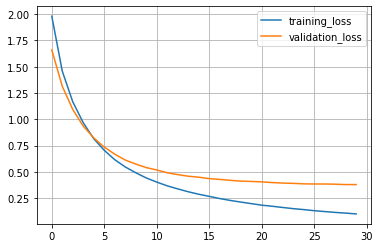

In [0]:
Neural = NeuralNetworkModel()
train = Neural.fit(new_x_train, new_y_train, (x_validate, y_validate), epochs=30)
accuracy = Neural.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")
drawplot()

## 2 Hidden Layers

Accuracy: 85.66%


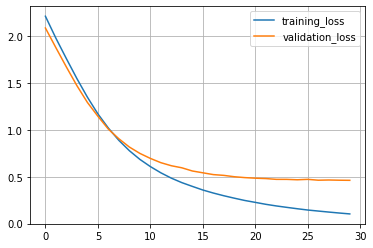

In [0]:
Neural = NeuralNetworkModel(nlayers=2)
train = Neural.fit(new_x_train, new_y_train, (x_validate, y_validate), epochs=30)
accuracy = Neural.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")
drawplot()

## 3 Hidden Layers

Accuracy: 83.37%


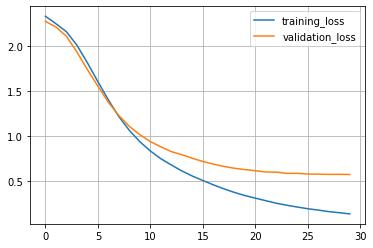

In [0]:
Neural = NeuralNetworkModel(nlayers=3)
train = Neural.fit(new_x_train, new_y_train, (x_validate, y_validate), epochs=30)
accuracy = Neural.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")
drawplot()

## 1 Hidden Layer with L2 Regularization

Accuracy: 17.7%


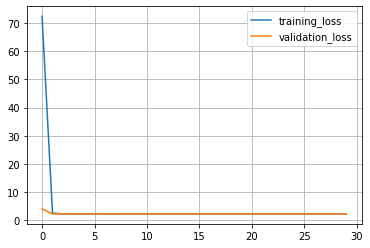

In [0]:
Neural = NeuralNetworkModel(l2=True)
train = Neural.fit(new_x_train, new_y_train, (x_validate, y_validate), epochs=30)
accuracy = Neural.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")
drawplot()

## 2 Hidden Layers with L2 Regularization

Accuracy: 10.1%


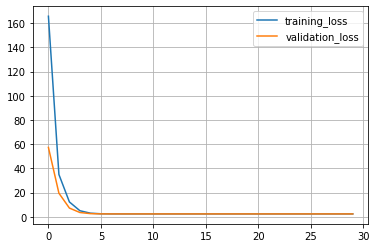

In [0]:
Neural = NeuralNetworkModel(nlayers=2, l2=True)
train = Neural.fit(new_x_train, new_y_train, (x_validate, y_validate), epochs=30)
accuracy = Neural.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")
drawplot()

## 3 Hidden Layers with L2 Regularization

Accuracy: 10.32%


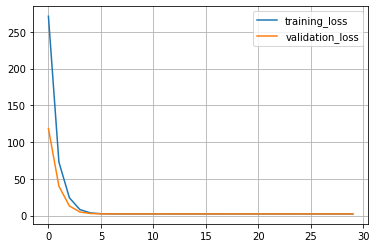

In [0]:
Neural = NeuralNetworkModel(nlayers=3, l2=True)
train = Neural.fit(new_x_train, new_y_train, (x_validate, y_validate), epochs=30)
accuracy = Neural.predict(x_test, y_test)
print("Accuracy: " + str(round(accuracy*100, 2)) + "%")
drawplot()

## Convolutional Neural Network Model

In [0]:
class ConvolutionalNeuralNet:
    
    def __init__(self):
        self.model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=(28,28,1)),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
            tf.keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1000, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')])
        
        self.model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
    
    def shift_rotate(self, rotate, shift):
        self.datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=rotate, width_shift_range=shift, height_shift_range=shift, horizontal_flip=True)
        
    def predict(self, x_test, y_test):
        return self.model.evaluate(x_test, y_test, verbose=0)
      
    def fit(self, x, y, validation_data, batch_size, epochs):
        self.model.fit_generator(self.datagen.flow(new_x_train, new_y_train, batch_size=batch_size), steps_per_epoch=len(new_x_train)/batch_size, epochs=epochs, verbose=0)

## Convolutional Neural Network

In [0]:
cnn = ConvolutionalNeuralNet()
cnn.shift_rotate(rotate=3, shift=3)
new_x_train = new_x_train.reshape(new_x_train.shape[0], 28, 28, 1)
x_validate = x_validate.reshape(x_validate.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
cnn.fit(new_x_train, new_y_train, (x_validate, y_validate), batch_size=128, epochs=10)
accuracy = cnn.predict(x_test, y_test)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']


C:\Users\aniru\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\aniru\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\aniru\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\aniru\anaconda3\lib\site-packages\keras_preprocessing

In [0]:
print("Accuracy: " + str(round(accuracy[1]*100, 2)) + "%")

Accuracy: 14.23%


References:

https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/

https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/

https://stats.stackexchange.com/questions/163388/why-is-the-l2-regularization-equivalent-to-gaussian-prior